<a href="https://www.kaggle.com/code/jmas19/stock-market-data-top-10?scriptVersionId=137990664" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Step 1

### load the dataset

In [2]:
# Reading in the dataset
stocks = pd.read_csv('/kaggle/input/stock-market-historical-data-of-top-10-companies/data.csv')

# Step 2

### EDA

Now that the `.csv` file has been read and loaded, we need to get familiar with the data and understand what we are working with. This is done through EDA.

In [3]:
# This will show a quick overview of the dataset
stocks.head()

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,$193.99,50520160,$191.90,$194.32,$191.81
1,AAPL,07/14/2023,$190.69,41616240,$190.23,$191.1799,$189.63
2,AAPL,07/13/2023,$190.54,41342340,$190.50,$191.19,$189.78
3,AAPL,07-12-2023,$189.77,60750250,$189.68,$191.70,$188.47
4,AAPL,07-11-2023,$188.08,46638120,$189.16,$189.30,$186.60


In [4]:
stocks.dtypes

Company       object
Date          object
Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

The only thing that can be statistically broken down is the Volume because it's the only thing that is a numerical data type at the moment.


In [5]:
stocks.describe().round(2)

,Volume
count,2.516000e+04
mean,5.131764e+07
std,6.399143e+07
min,1.143952e+06
25%,1.200394e+07
50%,2.672083e+07
75%,6.857269e+07
max,1.065209e+09


After looking at the data types and seeing how the `Date`, `Close/Last`, `Open`, `High`, and `Low` columns are an object type (string). We need to convert them to their correct data types.

In [6]:
import datetime
date_time_interval = pd.to_datetime(stocks.Date).dt.normalize()
date_time_interval

0       2023-07-17
1       2023-07-14
2       2023-07-13
3       2023-07-12
4       2023-07-11
           ...    
25155   2013-07-24
25156   2013-07-23
25157   2013-07-22
25158   2013-07-19
25159   2013-07-18
Name: Date, Length: 25160, dtype: datetime64[ns]

In [7]:
stocks.Date = date_time_interval

In [8]:
stocks.dtypes

Company               object
Date          datetime64[ns]
Close/Last            object
Volume                 int64
Open                  object
High                  object
Low                   object
dtype: object

Now the `Date` column is in it's proper data type, we need to fix the other columns.

In [9]:
stocks['Close/Last'] = stocks['Close/Last'].map(lambda x:float(x.replace('$','')))
stocks['Open'] = stocks['Open'].map(lambda x:float(x.replace('$','')))
stocks['High'] = stocks['High'].map(lambda x:float(x.replace('$','')))
stocks['Low'] = stocks['Low'].map(lambda x:float(x.replace('$','')))

In [10]:
stocks.dtypes

Company               object
Date          datetime64[ns]
Close/Last           float64
Volume                 int64
Open                 float64
High                 float64
Low                  float64
dtype: object

Let's rename the colum `Close/Last` to an easier name. I will rename the column to `Close`.

In [11]:
stocks.rename(columns={'Close/Last' : 'Close'}, inplace=True)

print(stocks)

      Company       Date     Close    Volume      Open      High       Low
0        AAPL 2023-07-17  193.9900  50520160  191.9000  194.3200  191.8100
1        AAPL 2023-07-14  190.6900  41616240  190.2300  191.1799  189.6300
2        AAPL 2023-07-13  190.5400  41342340  190.5000  191.1900  189.7800
3        AAPL 2023-07-12  189.7700  60750250  189.6800  191.7000  188.4700
4        AAPL 2023-07-11  188.0800  46638120  189.1600  189.3000  186.6000
...       ...        ...       ...       ...       ...       ...       ...
25155    NFLX 2013-07-24   34.4714  33395351   35.6743   36.0357   34.3143
25156    NFLX 2013-07-23   35.7514  76792963   35.9143   37.4621   35.1714
25157    NFLX 2013-07-22   37.4228  44791095   38.1214   38.3928   36.7314
25158    NFLX 2013-07-19   37.7966  18098750   38.2043   38.2784   37.5971
25159    NFLX 2013-07-18   38.0586  20418642   38.6157   38.6157   37.7143

[25160 rows x 7 columns]


In [12]:
stocks.Company.value_counts()

AAPL    2516
SBUX    2516
MSFT    2516
CSCO    2516
QCOM    2516
META    2516
AMZN    2516
TSLA    2516
AMD     2516
NFLX    2516
Name: Company, dtype: int64

In [13]:
stocks.Company.unique().size

10

In [14]:
stocks.isna().sum()

Company    0
Date       0
Close      0
Volume     0
Open       0
High       0
Low        0
dtype: int64

With this information we see that there are no NaN values in the dataset.

Now that the other columns have been converted to their proper data types there is more information to analyze.


In [15]:
stocks.describe().round(2)

,Close,Volume,Open,High,Low
count,25160.00,2.516000e+04,25160.00,25160.00,25160.00
mean,102.46,5.131764e+07,102.43,103.83,101.01
std,101.99,6.399143e+07,102.00,103.53,100.40
min,1.62,1.143952e+06,1.62,1.69,1.61
25%,36.57,1.200394e+07,36.51,36.89,36.13
50%,65.68,2.672083e+07,65.65,66.49,64.92
75%,134.24,6.857269e+07,134.32,136.23,132.66
max,691.69,1.065209e+09,692.35,700.99,686.09


In [16]:
stocks.head()

,Company,Date,Close,Volume,Open,High,Low
0,AAPL,2023-07-17,193.99,50520160,191.90,194.3200,191.81
1,AAPL,2023-07-14,190.69,41616240,190.23,191.1799,189.63
2,AAPL,2023-07-13,190.54,41342340,190.50,191.1900,189.78
3,AAPL,2023-07-12,189.77,60750250,189.68,191.7000,188.47
4,AAPL,2023-07-11,188.08,46638120,189.16,189.3000,186.60


In [17]:
# Split the dataset into separate DataFrames based on each company
company_dfs = dict(list(stocks.groupby('Company')))

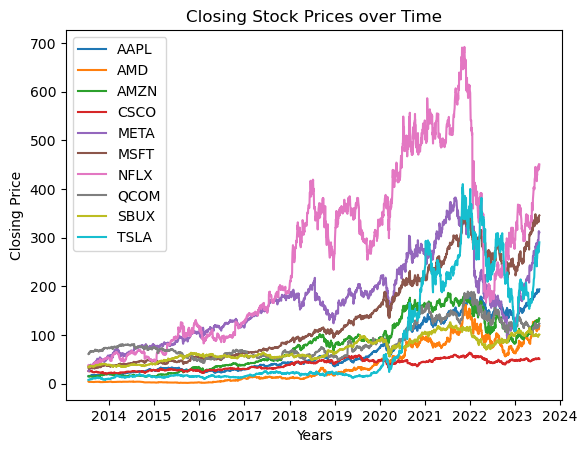

In [18]:
# Plotting the closing prices for each company
for Company, company_df in company_dfs.items():
    plt.plot(company_df['Date'], company_df['Close'], label=Company)

# Customize the plot
plt.xlabel('Years')
plt.ylabel('Closing Price')
plt.title('Closing Stock Prices over Time')
plt.legend()

# Display the plot
plt.show()

In [19]:
# Correllation Calculation
x = company_df['Close']
y = company_df['Volume']

scipy.stats.pearsonr(x, y) # Pearson's r

(-0.07225659991754517, 0.00028638550168310473)

In [20]:
scipy.stats.spearmanr(x, y)   # Spearman's rho

SpearmanrResult(correlation=0.10160520266919511, pvalue=3.270023765504987e-07)

In [21]:
scipy.stats.kendalltau(x, y)  # Kendall's tau

KendalltauResult(correlation=0.06421159880145144, pvalue=1.3801714304408564e-06)

This allows you to visually see each company and their closing price over time. For a clearer and cleaner visualization it will be handled in [Tableau](https://public.tableau.com/views/Historical_Stock_Data_of_the_10_companies/Historicalstockdataofthetop10companies?:language=en-US&:display_count=n&:origin=viz_share_link). 

In the Tableau visualization we can see that the trading volume of each stock was lighter when the price got higher and further away than the average closing price. This is an indication that the stock price was over valued.

There is also a large drop in the closing price during the pandemic, meaning that the stock price can be largly effected by extrenuating circumstances that cannot be predicted or controld.